<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/MLP_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from IPython.display import Image
from google.colab.patches import cv2_imshow
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)



# DataSet

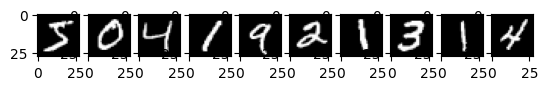

number of training images: 60000
number of test images: 10000


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape-->(60000, 28, 28)
# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

# input of MLP, a images were transfer into a vector

In [ ]:
# update all the training, testing dataset.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

# **Model MLP**

In [ ]:
from keras.src import activations
num_classes = 10
model = keras.Sequential(
    [
        layers.Dense(500, input_shape=(28*28,), activation='relu'), #Parm = (28*28+1)*500 = 392500
        layers.Dense(250, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]

);
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 10)                2510      
                                                                 
Total params: 520260 (1.98 MB)
Trainable params: 520260 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Model Compile**

In [ ]:
model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

batch_size = 250
epochs = 10
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6267 - accuracy: 0.8413 - val_loss: 0.3116 - val_accuracy: 0.9128
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2950 - accuracy: 0.9165 - val_loss: 0.2518 - val_accuracy: 0.9289
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2430 - accuracy: 0.9305 - val_loss: 0.2182 - val_accuracy: 0.9374
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2098 - accuracy: 0.9398 - val_loss: 0.1976 - val_accuracy: 0.9452
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1841 - accuracy: 0.9467 - val_loss: 0.1763 - val_accuracy: 0.9501
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1640 - accuracy: 0.9537 - val_loss: 0.1624 - val_accuracy: 0.9546
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1478 - accuracy: 0.9580 - val_loss: 0.1504 - val_ac

# **Model Evaluation**

In [ ]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.12267787754535675
Test accuracy: 0.9648000001907349


# **Model Prediction**

In [ ]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 4ms/step
Test prediction: [7 2 1 ... 4 5 6]


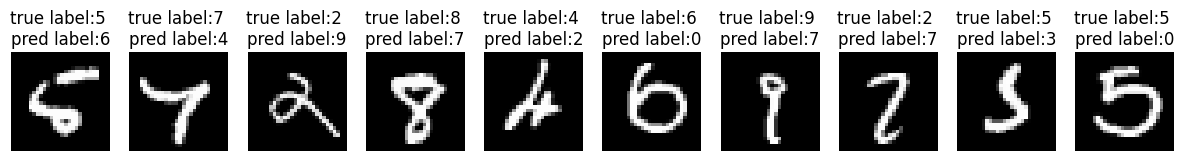

In [ ]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


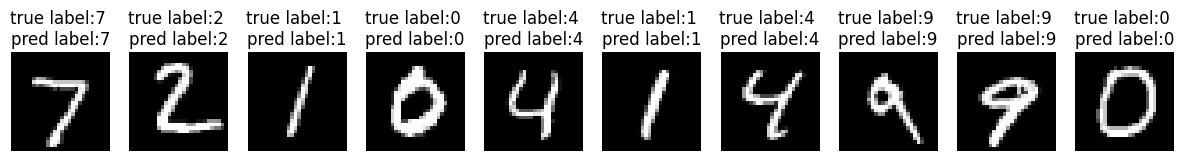

In [ ]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


# DataSet

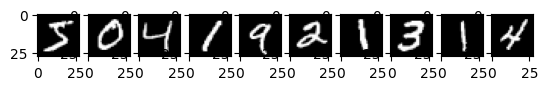

number of training images: 60000
number of test images: 10000


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape-->(60000, 28, 28)
# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

# **Model CNN**

In [ ]:
num_filters = 16
filter_size = 3
pool_size = 2

# Build the model.
model = keras.Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1), activation='relu', padding = 'same', strides = 2),
  Conv2D(num_filters, filter_size, activation='relu', padding = 'same', strides = 2),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 3, 3, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 144)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1450      
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

# **Model Compile**

In [ ]:
model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

batch_size = 250
epochs = 10

# Train the model.
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 2.1390 - accuracy: 0.2743 - val_loss: 0.8398 - val_accuracy: 0.7287
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5315 - accuracy: 0.8372 - val_loss: 0.3194 - val_accuracy: 0.8999
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3135 - accuracy: 0.9046 - val_loss: 0.2438 - val_accuracy: 0.9253
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2663 - accuracy: 0.9203 - val_loss: 0.2396 - val_accuracy: 0.9248
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2397 - accuracy: 0.9273 - val_loss: 0.2359 - val_accuracy: 0.9254
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2292 - accuracy: 0.9311 - val_loss: 0.1893 - val_accuracy: 0.9459
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2121 - accuracy: 0.9365 - val_loss: 0.1835 - val_ac

# **Model Evaluation**

In [ ]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.17720241844654083
Test accuracy: 0.9412999749183655


# **Model Prediction**

In [ ]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 3ms/step
Test prediction: [7 2 1 ... 4 5 6]


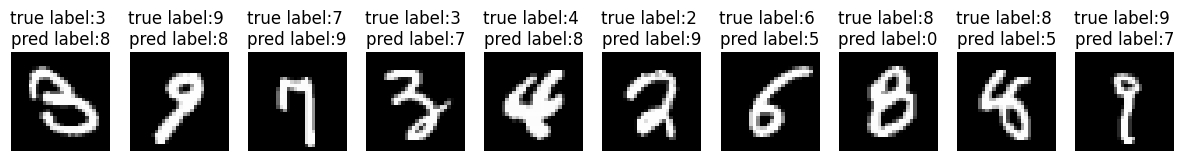

In [ ]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


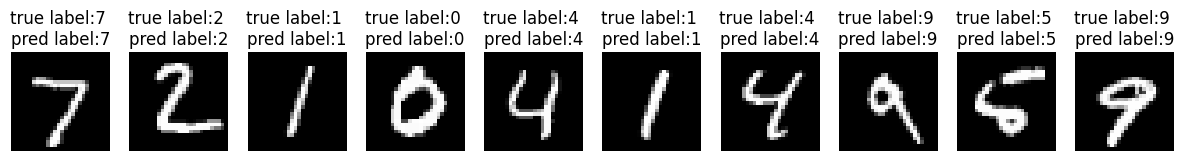

In [ ]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1
